# Test the Simple atmospheric differential transparency Emulator differentiation

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/10/26
- last update : 2023/10/26


- This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

- It is implemented in jax for auto differentiation

- access to data see https://setuptools.pypa.io/en/latest/userguide/datafiles.html

In [1]:
import numpy as np
import jax.numpy as jnp
from jax import grad, jit
import pandas as pd
import os
import seaborn as sns

In [2]:
#from simpleemulator.simpleatmemulator import SimpleAtmEmulator,find_data_path
#from simpleemulator.simpleatmemulator import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [3]:
from diffemulator.diffemulator  import SimpleDiffAtmEmulator,final_path_data
from diffemulator.diffemulator  import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Check emulator

In [6]:
site = 'LSST'
emul  = SimpleDiffAtmEmulator(obs_str=site)
path = final_path_data

Observatory LSST found in preselected observation sites


I0000 00:00:1698350418.791826       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [7]:
emul = SimpleDiffAtmEmulator()

Observatory LSST found in preselected observation sites


In [8]:
WL = emul.GetWL()

In [9]:
airmasses = emul.AIRMASS
NAM = len(airmasses)

In [10]:
hls_colors = sns.color_palette("hls", NAM)
#sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

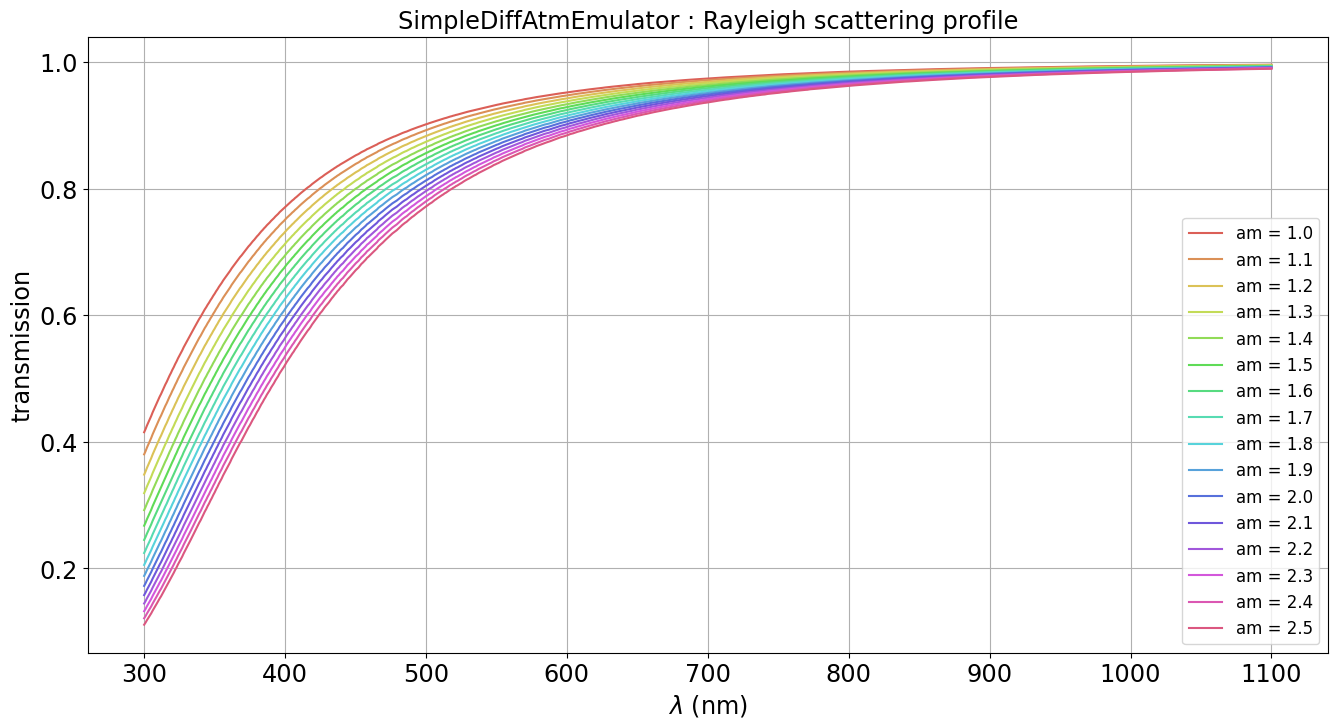

In [12]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):
    label = f"am = {am:.1f}" 
    #transm = emul.GetRayleighTransparencyArray(WL,am)
    am_arr = jnp.array([am])
    transm = emul.GetRayleighTransparency2D(WL,am_arr)[0,:]
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
title = f"SimpleDiffAtmEmulator : Rayleigh scattering profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [13]:
transm.shape

(800,)

TypeError: tuple indices must be integers or slices, not tuple

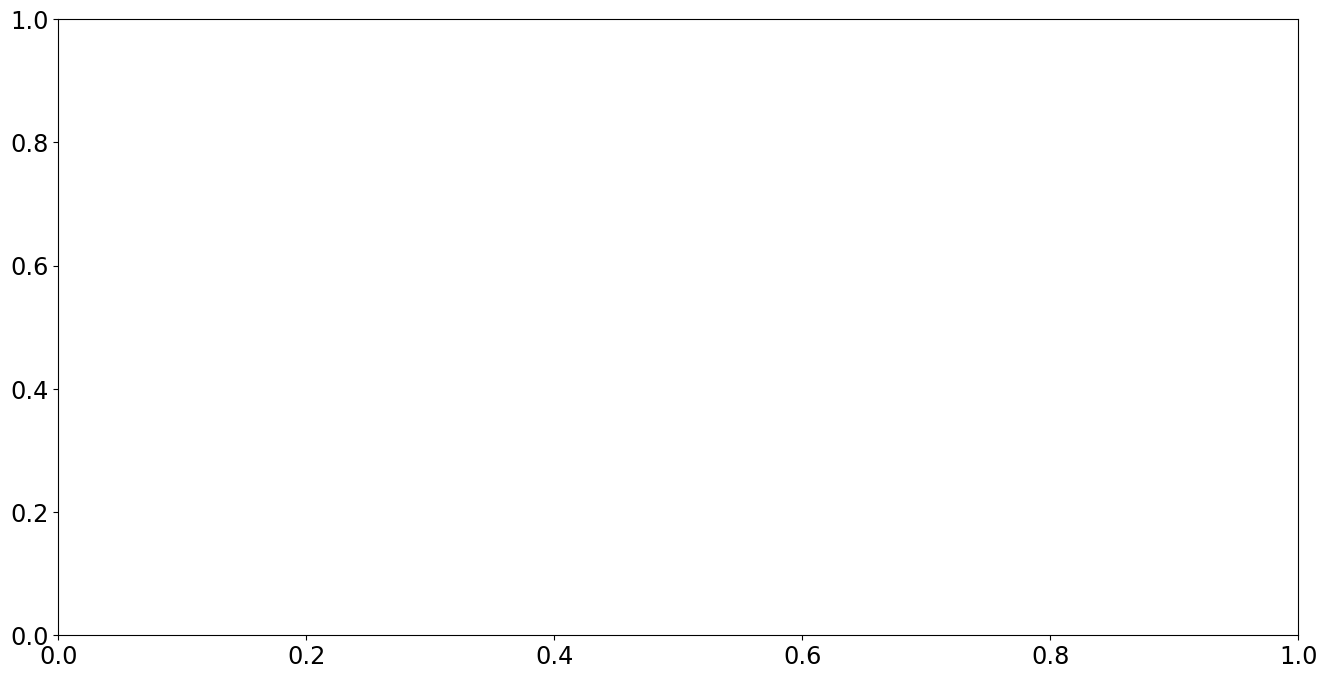

In [15]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):
    label = f"am = {am:.1f}" 
    am_arr = jnp.array([am])
    dtransm = emul.DiffGetRayleighTransparency2D(WL,am_arr)[0,0,:]
    ax.plot(WL,dtransm,color=hls_colors[idx],label=label)
title = f"SimpleDiffAtmEmulator : Rayleigh scattering profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [ ]:
dtransm.shape

## Check emulator with Oxygen O2 absorption

In [ ]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):
    transm = emul.GetO2absTransparencyArray(WL,am)
    label = f"am = {am:.1f}" 
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
title = f"SimpleDiffAtmEmulator : O2 absorption profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(600.,800.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with PWV absorption

In [ ]:
pwvs = emul.PWV
NPWV=len(pwvs)

In [ ]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

In [ ]:
am = 1
fig, ax = plt.subplots()

for idx,pwv in enumerate(pwvs):

    transm = emul.GetPWVabsTransparencyArray(WL,am,pwv)
    ax.plot(WL,transm,color=hls_colors[idx])
    
title = f"SimpleDiffAtmEmulator : H2O absorption profile, airmass = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(700.,1000.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with Ozone absorption

In [ ]:
ozs = emul.OZ
NOZ = len(ozs)

In [ ]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

In [ ]:
am =1

fig, ax = plt.subplots()

for idx,oz in enumerate(ozs):

    transm = emul.GetOZabsTransparencyArray(WL,am,oz)
    ax.plot(WL,transm,color=hls_colors[idx])
    
itle = f"SimpleDiffAtmEmulator : Ozone absorption profile, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,800.)
ax.set_ylim(0.9,1.0)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Check emulator with combined ascattering and absorption process and check with libradtran

In [ ]:
am0 = 1.0
pwv0 = 5.0
oz0 = 500.
transm1 = emul.GetGriddedTransparencies(WL,am0,pwv0,oz0,flagRayleigh=True)
label1=f"emulator : airmass = {am0:.2f}, pwv  = {pwv0:.2f} mm , oz = {oz0:.1f} DU"

In [ ]:
am1 = 2.0
pwv1 = 5.0
oz1 = 500.
transm2 = emul.GetGriddedTransparencies(WL,am1,pwv1,oz1,flagRayleigh=True)
label2=f"emulator : airmass = {am1:.2f},  pwv  = {pwv1:.2f} mm , oz = {oz1:.1f} DU"

In [ ]:
fig, ax = plt.subplots()

ax.plot(WL,transm1,'b-',label=label1)
ax.plot(WL,transm2,'r-',label=label2)

title = f"SimpleDiffAtmEmulator : total transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()


## Check with aerosols

In [ ]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

In [ ]:
ncomp=0

fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm = emul.GetAerosolsTransparencies(WL,am,ncomp)
    ax.plot(WL,transm,color=hls_colors[idx])
    
ax.set_ylim(0,1.1)

title = f"SimpleDiffAtmEmulator : no aerosol transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [ ]:
taus = [0.05, 0.01]
betas = [- 1.0, -2]
ncomp=2

fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm = emul.GetAerosolsTransparencies(WL,am,ncomp,taus,betas)
    label = f"am = {am:.1f}"
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : two components aerosols at different airmasses"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [ ]:
all_taus = [0.01, 0.05, 0.1]
betas = [- 1.0]
beta = betas[0]
ncomp=1
am=1

NTAUS = len(all_taus)

hls_colors = sns.color_palette("hls", NTAUS)
sns.palplot(hls_colors)

In [ ]:
am  = 1

fig, ax = plt.subplots()
for idx,tau in enumerate(all_taus):
    taus = [tau]
    label = f"$\\tau$ = {tau:.2f} , $\\beta$ =  {beta:.2f}"
    transm = emul.GetAerosolsTransparencies(WL,am,ncomp,taus,betas)
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : One component aerosol transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

## Test all combined transmission

In [ ]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

### Without aerosols

In [ ]:
pwv0 = 5.0
oz0 = 500.

fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm = emul.GetAllTransparencies(WL,am,pwv0,oz0)
    label = f"am = {am:.1f}"
    ax.plot(WL,transm,color=hls_colors[idx],label=label)
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : combined transmission - no aerosol"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

### With aerosols

In [ ]:
wv0 = 5.0
oz0 = 500.
ncomp=1
taus= [0.02]
betas = [-1]

fig, ax = plt.subplots()

for idx,am in enumerate(airmasses):

    transm = emul.GetAllTransparencies(WL,am,pwv0,oz0,ncomp=ncomp, taus=taus, betas=betas, flagAerosols=True)
    transmnoaer = emul.GetAllTransparencies(WL,am,pwv0,oz0)
    label = f"am = {am:.1f}"
    ax.plot(WL,transm,color=hls_colors[idx],label = label)
    ax.plot(WL,transmnoaer,":",color=hls_colors[idx])
    
ax.set_ylim(0,1)
title = f"SimpleDiffAtmEmulator : combined transmission - with/without aerosol"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()